#### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터 셋 :  임의로 생성
- 피쳐/속성 : 공부시간
- 라벨/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터 분포가 선형 분포여야함! 

##### 1. 데이터 준비

In [129]:
# 점수 (14개 데이터)
jumsu = range(7,100, 7)
jumsu[-1], len(jumsu)

(98, 14)

In [130]:
# 시간 (14개 데이터)
hour=range(1, 29, 2)
len(hour)

14

In [131]:
# DF 및 시리즈 제작
import pandas as pd
hourDF = pd.DataFrame(hour, columns=['hour'])
jumsuSR = pd.Series(jumsu)

In [132]:
print(hourDF.head(), jumsuSR.head(), sep='\n\n')

   hour
0     1
1     3
2     5
3     7
4     9

0     7
1    14
2    21
3    28
4    35
dtype: int64


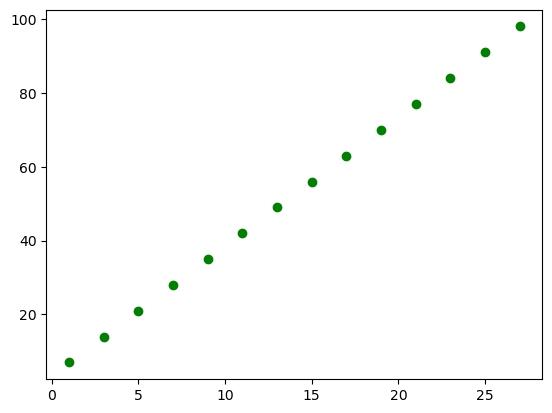

In [133]:
### 현재 그래프의 분포 확인
import matplotlib.pyplot as plt
plt.plot(hourDF, jumsuSR, 'go')

##### 2. 모델 생성 및 학습 진행

In [134]:
from sklearn.linear_model import LinearRegression
import numpy as np
np.set_printoptions(suppress=True) # np 상수값 표현 없애는 모듈 사용

In [135]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [136]:
# 학습 진행 >> 최대한 많은 데이터를 만족하는 직선의 기울기(a)와 절편(b) 찾기
model.fit(hourDF,jumsuSR)

LinearRegression()

In [137]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_}, 절편 : {model.intercept_}')

기울기 : [3.5], 절편 : 3.500000000000014


In [138]:
# y= ax+b
pre_jumsu = model.coef_[0]*hourDF+model.intercept_


pre_jumsu= pre_jumsu.values.reshape(-1)

In [139]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsuSR = jumsuSR.to_numpy()

In [140]:
real_jumsuSR- pre_jumsu 

array([-0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

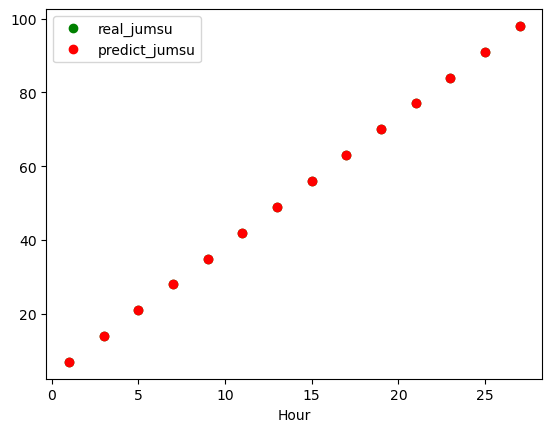

In [141]:
### 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go', label = 'real_jumsu')
plt.plot(hourDF, pre_jumsu, 'ro', label = 'predict_jumsu')
plt.xlabel('Hour')
plt.ylabel('')
plt.legend()
plt.show()

##### 3.모델 성능 평가

In [142]:
model.score(hourDF,jumsuSR)

1.0

In [143]:
### 오차 계산 >> 손실/비용함수 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [144]:
# 잠깐 버전 확인
### - root_mean_squared_error v 1.4 이상
import sklearn
sklearn.__version__

'1.3.0'

In [145]:
# 오차계산
pre_y = model.predict(hourDF) # 예측값

In [146]:
mse = mean_squared_error(jumsuSR, pre_y)
rmse = mean_squared_error(jumsuSR, pre_y, squared=False)
mea = mean_absolute_error(jumsuSR, pre_y) 
r2 = r2_score(jumsuSR, pre_y)

In [147]:
# 손실 > 비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}') # 비용/손실 함수
print(f'rmse : {rmse}') # 비용/손실 함수
print(f'mea : {mea}') # 비용/손실 함수
print(f'r2 : {r2}') # 결제계수

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mea : 6.026924990822278e-15
r2 : 1.0
